In [33]:
import pandas as pd
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
import math

In [34]:
def parse_s2p(file):
    data_s2p = pd.read_table(file, sep=" ", header=None,  names=["Frequency ", "S11 real", "S11 imaginary", "S12 real", "S12 imaginary",  "S21 real", "S21 imaginary",  "S22 real", "S22 imaginary" ])
    data_s2p.drop(data_s2p.head(3).index,inplace=True)
    return data_s2p

In [35]:
s2p_file = 'C:/Users/Dell/Desktop/EE work/s2p/SEI_VGQ0VDQ000_T25_s2p/AA1.s2p'
s2p_dataframe = parse_s2p(s2p_file)
s2p_dataframe

,Frequency,S11 real,S11 imaginary,S12 real,S12 imaginary,S21 real,S21 imaginary,S22 real,S22 imaginary
3,+4.00000E+08,+9.53696E-01,-2.74974E-01,+3.21316E-02,+9.57841E-02,+3.05717E-02,+9.85699E-02,+9.37964E-01,-0.351019
4,+5.00000E+08,+9.30347E-01,-3.37407E-01,+4.90809E-02,+1.04357E-01,+4.97536E-02,+1.02469E-01,+8.46092E-01,-0.512975
5,+6.00000E+08,+9.02299E-01,-4.01366E-01,+5.45281E-02,+1.18240E-01,+5.39680E-02,+1.17853E-01,+9.05567E-01,-0.409054
6,+7.00000E+08,+8.68602E-01,-4.55542E-01,+7.17821E-02,+1.42789E-01,+6.96999E-02,+1.41848E-01,+9.02341E-01,-0.387121
7,+8.00000E+08,+8.35227E-01,-5.07609E-01,+9.92422E-02,+1.50085E-01,+9.93924E-02,+1.50941E-01,+8.11727E-01,-0.533485
...,...,...,...,...,...,...,...,...,...
396,+3.97000E+10,+2.49894E-01,+7.26203E-01,-3.11288E-02,-4.64411E-02,-2.89668E-02,-4.14052E-02,+6.69436E-02,0.894668
397,+3.98000E+10,+2.58512E-01,+7.15037E-01,-2.07990E-02,-4.50642E-02,-1.66711E-02,-3.84743E-02,+5.88564E-02,0.897258
398,+3.99000E+10,+2.73428E-01,+7.11312E-01,-1.61268E-02,-4.44515E-02,-3.45821E-02,-5.08207E-02,+7.34564E-02,0.879140
399,+4.00000E+10,+2.76142E-01,+7.18930E-01,-2.05340E-02,-4.40755E-02,-2.40868E-02,-4.37320E-02,+9.49006E-02,0.889600


In [36]:
s2p_data_array = np.asarray(s2p_dataframe)
s2p_data_array = s2p_data_array.astype('float32')
s2p_data_array

array([[ 4.00000e+08,  9.53696e-01, -2.74974e-01, ...,  9.85699e-02,
         9.37964e-01, -3.51019e-01],
       [ 5.00000e+08,  9.30347e-01, -3.37407e-01, ...,  1.02469e-01,
         8.46092e-01, -5.12975e-01],
       [ 6.00000e+08,  9.02299e-01, -4.01366e-01, ...,  1.17853e-01,
         9.05567e-01, -4.09054e-01],
       ...,
       [ 3.99000e+10,  2.73428e-01,  7.11312e-01, ..., -5.08207e-02,
         7.34564e-02,  8.79140e-01],
       [ 4.00000e+10,  2.76142e-01,  7.18930e-01, ..., -4.37320e-02,
         9.49006e-02,  8.89600e-01],
       [ 4.01000e+10,  2.70320e-01,  7.07607e-01, ..., -4.09665e-02,
         8.63808e-02,  8.98065e-01]], dtype=float32)

In [37]:
frequency = []
for f in s2p_data_array[:,0]:
    frequency.append(f)
# frequency

In [38]:
ntwkB = rf.Network(s2p_file)

In [39]:
s2p_y_array = ntwkB.y
# s2p_y_array

In [40]:
point = s2p_y_array[0]
point

array([[ 2.27888621e-05+0.00283455j,  2.02086604e-05-0.00105947j],
       [-3.98885642e-06-0.00103735j, -6.93515872e-05+0.00362656j]])

In [45]:
point

array([[ 2.27888621e-05+0.00283455j,  2.02086604e-05-0.00105947j],
       [-3.98885642e-06-0.00103735j, -6.93515872e-05+0.00362656j]])

In [46]:
Y = []
Y11_real = []
Y11_img = []
Y11_mag = []
Y11_mag_abs = []
Y12_real = []
Y12_img = []
Y12_mag = []
Y21_real = []
Y21_img = []
Y21_mag = []
Y22_real = []
Y22_img = []
Y22_mag = []

In [47]:
for point in s2p_y_array:
    Y11_real.append(point[0][0].real)
    Y11_img.append(point[0][0].imag)
    Y11_mag.append(rf.mathFunctions.complex_2_db(point[0][0]))
    Y11_mag_abs.append(abs(point[0][0]))
    Y12_real.append(point[0][1].real)
    Y12_img.append(point[0][1].imag)
    Y12_mag.append(rf.mathFunctions.complex_2_db(point[0][1]))
    Y21_real.append(point[1][0].real)
    Y21_img.append(point[1][0].imag)
    Y21_mag.append(rf.mathFunctions.complex_2_db(point[1][0]))
    Y22_real.append(point[1][1].real)
    Y22_img.append(point[1][1].imag)
    Y22_mag.append(rf.mathFunctions.complex_2_db(point[1][1]))

Y.append(Y11_real)
Y.append(Y11_img)
Y.append(Y11_mag)
Y.append(Y11_mag_abs)
Y.append(Y12_real)
Y.append(Y12_img)
Y.append(Y12_mag)
Y.append(Y21_real)
Y.append(Y21_img)
Y.append(Y21_mag)
Y.append(Y22_real)
Y.append(Y22_img)
Y.append(Y22_mag)

In [12]:
# Y

[[2.278886205595744e-05,
  3.879285414673046e-05,
  4.219773592689703e-05,
  6.968646952296591e-05,
  6.868388247265469e-05,
  0.00011050062695394072,
  0.00014805424339794552,
  0.00016421726131891654,
  0.00016837228606594932,
  0.00023464125110990544,
  0.0002709862652474089,
  0.0002960447805797327,
  0.00033347584758628714,
  0.0003865453081764177,
  0.00043462752773669726,
  0.0004709039754640679,
  0.0005477260401652525,
  0.0005993183392400022,
  0.000694745704182579,
  0.0007413681315463148,
  0.0007861430290631283,
  0.0008838160403573362,
  0.0009591807190372809,
  0.0010459299569075661,
  0.0011732776994212118,
  0.0012022957178021549,
  0.001353256972880633,
  0.0014678713740736116,
  0.0015689144609739329,
  0.001689395026623123,
  0.001814445758550795,
  0.0019104851711629746,
  0.0021031337979904173,
  0.002245234390489693,
  0.002281570449830122,
  0.0024222299806401144,
  0.002818479507895548,
  0.0029384130694898917,
  0.0031077988685495723,
  0.0034386037580635296,


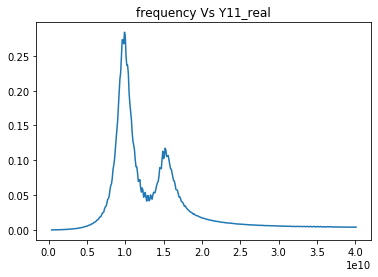

In [48]:
plt.title('frequency Vs Y11_real')
plt.plot(frequency, Y11_real)

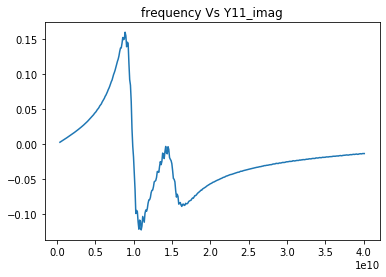

In [49]:
plt.title('frequency Vs Y11_imag')
plt.plot(frequency, Y11_img)

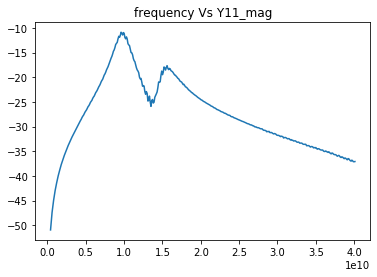

In [50]:
plt.title('frequency Vs Y11_mag')
plt.plot(frequency, Y11_mag)

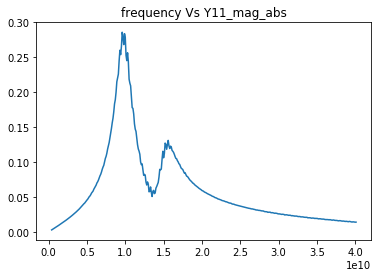

In [51]:
plt.title('frequency Vs Y11_mag_abs')
plt.plot(frequency, Y11_mag_abs)

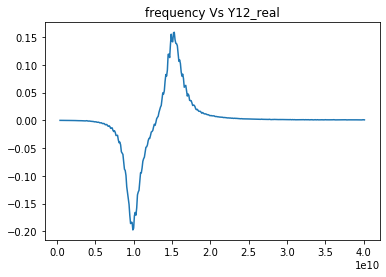

In [27]:
plt.title('frequency Vs Y12_real')
plt.plot(frequency, Y12_real)

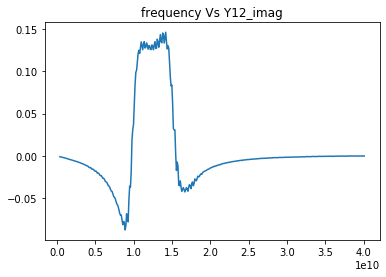

In [28]:
plt.title('frequency Vs Y12_imag')
plt.plot(frequency, Y12_img)

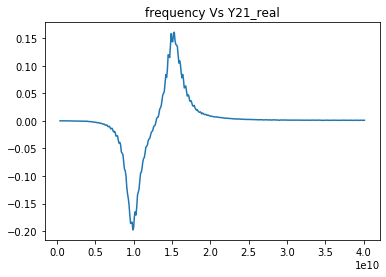

In [29]:
plt.title('frequency Vs Y21_real')
plt.plot(frequency, Y21_real)

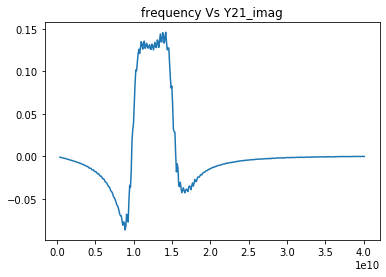

In [30]:
plt.title('frequency Vs Y21_imag')
plt.plot(frequency, Y21_img)

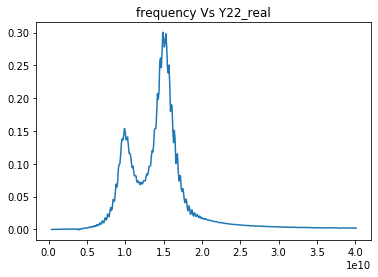

In [31]:
plt.title('frequency Vs Y22_real')
plt.plot(frequency, Y22_real)

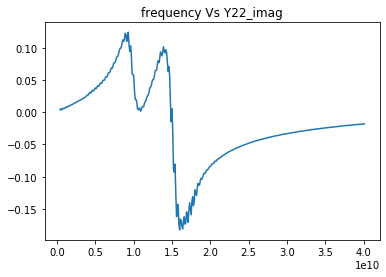

In [32]:
plt.title('frequency Vs Y22_imag')
plt.plot(frequency, Y22_img)

In [ ]:
################################## converting network to z parameter #########################################

In [19]:
s2p_z_array = ntwkB.z
s2p_z_array

array([[[ 3.37164603-394.993844j  ,  0.97935786-115.3937827j ],
        [-1.63013246-112.95734172j, -5.74901987-308.64199418j]],

       [[ 3.80547978-305.82666925j,  0.89935199 -66.03899181j],
        [ 1.73936043 -66.84199739j,  1.7507953 -192.93515409j]],

       [[ 2.1606715 -260.56765935j, -0.40812895 -82.04840514j],
        [-0.63032385 -82.41764101j, -1.72847706-256.98495603j]],

       ...,

       [[20.23125755 +68.58586576j,  3.80184472  -2.80471547j],
        [ 3.36671048  -1.36868403j,  6.75648949 +53.71914884j]],

       [[19.51502648 +68.89186842j,  3.34781733  -1.90166682j],
        [ 3.37790457  -1.62805464j,  6.17085201 +55.08906762j]],

       [[20.55098515 +68.31396268j,  3.0903792   -2.06240392j],
        [ 3.30339232  -2.327718j  ,  5.60739865 +54.57855943j]]])

In [ ]:
################################## converting network to abcd parameter #########################################

In [22]:
s2p_abcd_array = ntwkB.a
s2p_abcd_array

array([[[ 3.49568204e+00+8.02964257e-02j,
          3.70674559e+00-9.63982117e+02j],
        [-1.27733123e-04+8.85105619e-03j,
          2.73254197e+00-1.14610921e-02j]],

       [[ 4.57375141e+00-6.20855541e-02j,
         -4.87013547e+00-8.16507141e+02j],
        [ 3.89042249e-04+1.49505304e-02j,
          2.88516402e+00-4.88846080e-02j]],

       [[ 3.16116662e+00+5.03924910e-02j,
          7.89423704e+00-7.30410962e+02j],
        [-9.27893177e-05+1.21326151e-02j,
          3.11805993e+00+2.87451195e-03j]],

       ...,

       [[-1.95029705e+00+1.95789111e+01j,
         -1.06874145e+03+3.03211251e+01j],
        [ 2.54898656e-01+1.03625103e-01j,
         -3.84443225e+00+1.43930807e+01j]],

       [[-3.28856287e+00+1.88098589e+01j,
         -1.05985864e+03-6.31893399e+01j],
        [ 2.40235569e-01+1.15786762e-01j,
         -4.89612661e+00+1.39488565e+01j]],

       [[-5.58015460e+00+1.67479158e+01j,
         -9.48457647e+02-2.08582155e+02j],
        [ 2.02281470e-01+1.42536572e-01j,


In [55]:
ntwk_test = 'Downloads/UnitCell_Manifold_in_wLauncher.s2p'
ntwk_test

'Downloads/UnitCell_Manifold_in_wLauncher.s2p'

In [56]:
rf.network.de_embed(ntwk_test, s2p_file)

AttributeError: 'str' object has no attribute 'inv'